<a href="https://colab.research.google.com/github/feysel2003/feysel/blob/main/ML_decision_tree_model_by_using_PlayTennis_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Load libraries & dataset**

In [ ]:
# 1) Imports and load data
import pandas as pd
import numpy as np

# Load dataset from the Gist (raw)
url = "https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/PlayTennis.csv"
df = pd.read_csv(url)

# quick look
print("shape:", df.shape)
display(df.head())


shape: (14, 5)


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


**2) Inspect the data**

In [ ]:
# 2) Inspect
print("Columns:", df.columns.tolist())
print("\nInfo:")
display(df.info())
print("\nValue counts per column:")
for c in df.columns:
    print("\n---", c, "---")
    print(df[c].value_counts())


Columns: ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


None


Value counts per column:

--- Outlook ---
Outlook
Sunny       5
Rain        5
Overcast    4
Name: count, dtype: int64

--- Temperature ---
Temperature
Mild    6
Hot     4
Cool    4
Name: count, dtype: int64

--- Humidity ---
Humidity
High      7
Normal    7
Name: count, dtype: int64

--- Wind ---
Wind
Weak      8
Strong    6
Name: count, dtype: int64

--- Play Tennis ---
Play Tennis
Yes    9
No     5
Name: count, dtype: int64


**3) Preprocess / encode categorical features**

The dataset has categorical columns (e.g., Outlook, Temperature, Humidity, Wind) and target Play Tennis. We must convert them to numbers.

In [ ]:
# 3) Preprocess: rename target (safe name), and encode categories
df = df.rename(columns={df.columns[-1]: "PlayTennis"})  # ensure target named PlayTennis

# Check column names again
print(df.columns.tolist())

# Use simple label encoding for small categorical dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_encoded = df.copy()
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

display(df_encoded.head())


['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


**3.1) correlation**

Correlation Matrix:


,Outlook,Temperature,Humidity,Wind,Play Tennis
Outlook,1.000000,0.092036,-8.944272e-02,7.745967e-02,-0.493333
Temperature,0.092036,1.000000,-5.144958e-01,-2.475369e-02,-0.051131
Humidity,-0.089443,-0.514496,1.000000e+00,-6.409876e-17,0.447214
Wind,0.077460,-0.024754,-6.409876e-17,1.000000e+00,0.258199
Play Tennis,-0.493333,-0.051131,4.472136e-01,2.581989e-01,1.000000


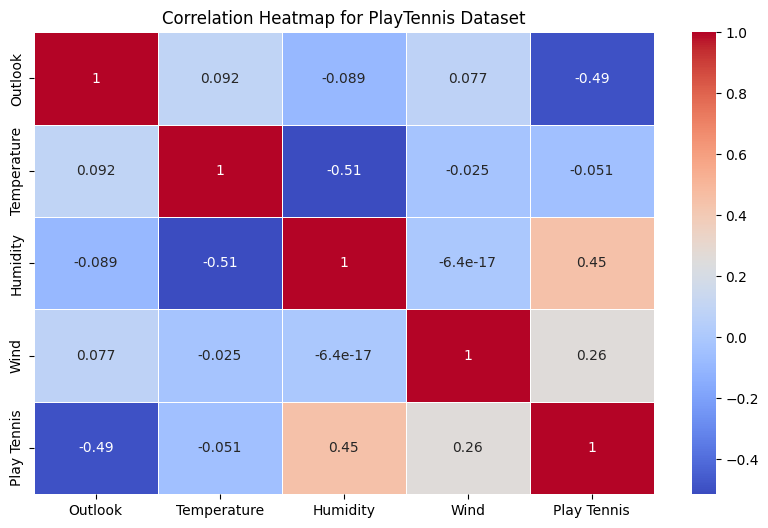

In [ ]:
# -------------------------------
# STEP 3.2 — Correlation Analysis
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
url = "https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/PlayTennis.csv"
df = pd.read_csv(url)

# Encode all categorical columns
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Compute correlation matrix
corr = df_encoded.corr()

# Display correlation values
print("Correlation Matrix:")
display(corr)

# ---- Heatmap Visualization ----
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for PlayTennis Dataset")
plt.show()


**4) Split features and target; train/test split**

In [ ]:
df.columns


Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis'], dtype='object')

In [ ]:
# 4) Features and Target
X = df_encoded.drop(columns=['Play Tennis'])   # Features
y = df_encoded['Play Tennis']                  # Target

# Train/test split (70% train, 30% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


**5) Train a Decision Tree classifier**

In [ ]:
# 5) Train Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)   # default parameters
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**6) Evaluate the model**

In [ ]:
# 6) Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6

Confusion matrix:
 [[1 1]
 [1 2]]

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



**7) Visualize the tree (text and plot)**

|--- Humidity <= 0.50
|   |--- Outlook <= 1.50
|   |   |--- Wind <= 0.50
|   |   |   |--- class: 0
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1
|   |--- Outlook >  1.50
|   |   |--- class: 0
|--- Humidity >  0.50
|   |--- class: 1



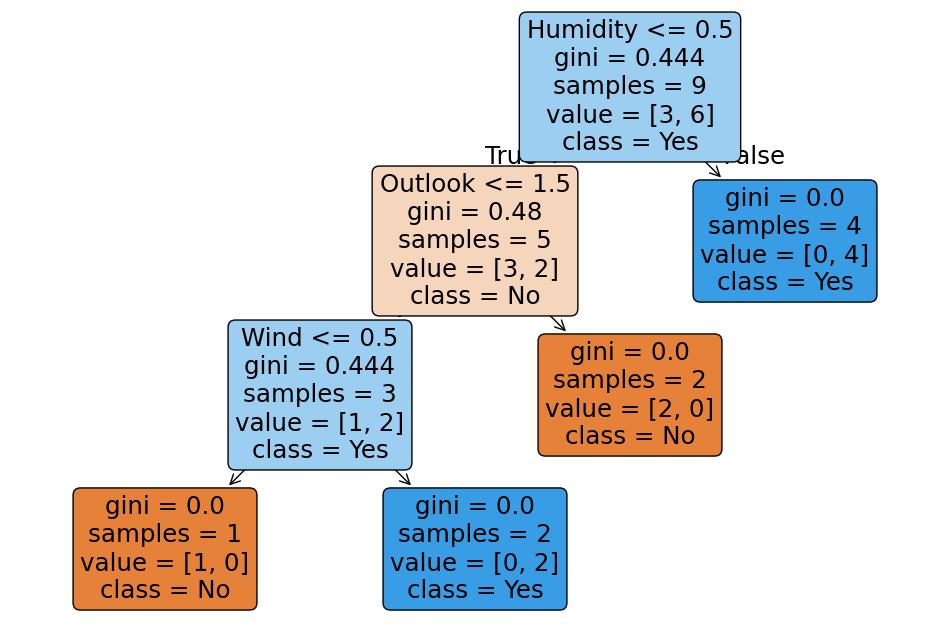

In [ ]:
# 7) Visualize: text summary
from sklearn import tree
print(tree.export_text(clf, feature_names=list(X.columns)))

# Visual plot (matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No','Yes'], filled=True, rounded=True)
plt.show()


**entropy,gini,logloss**
apply eda technique
preprocessing
decission tree criteria like
logloss,gini,entropy.
general interpritation of the above three DC vriteria